#Signals and Systems

## Laplace Transform

Written by Márcio J. Lacerda

Consider a function $f(t)$, $f:\mathbb{R}\rightarrow \mathbb{R}$, $f(t)=0$ for all $t<0$. 

The unilateral Laplace transform $\mathcal{L}\left[f(t)\right]$ is a function $F:\mathbb{C}\rightarrow \mathbb{C}$, with complex variables $s\in \mathbb{C}$ defined as

$$
F(s)=\int_{0}^{\infty}e^{-st}f(t)dt
$$

for all $s\in \mathbb{C}$ such that the integral exists.


###Step function
The Laplace transform of the step function $u(t)$ is computed as:

$$
u(t)= \left\{ \begin{aligned} 0 & \quad \mbox{for}~ t<0 \\ 1 & \quad \mbox{for}~ t\geq 0  \end{aligned}\right., \quad 
F(s)=\int_0^{\infty}e^{-st}dt =\left. -\frac{1}{s}e^{-st}\right|_0^{\infty}= 0-\left(-\frac{1}{s}\right)=\frac{1}{s}
$$



In [1]:
import sympy as sym

sym.init_printing()

t = sym.symbols('t', real=True)

s = sym.symbols('s', complex=True)

F = sym.integrate(sym.exp(-s*t), (t, 0, sym.oo))

print("The Laplace transform of the signal is", )
F

The Laplace transform of the signal is


⎧    1                      π
⎪    ─       for │arg(s)│ < ─
⎪    s                      2
⎪                            
⎪∞                           
⎨⌠                           
⎪⎮  -s⋅t                     
⎪⎮ ℯ     dt     otherwise    
⎪⌡                           
⎪0                           
⎩                            

SymPy has a specific function that can be used to compute the Laplace transform. To exemplify this function we will employ the unit step. The function Heaviside in SymPy represents the unit step function. 

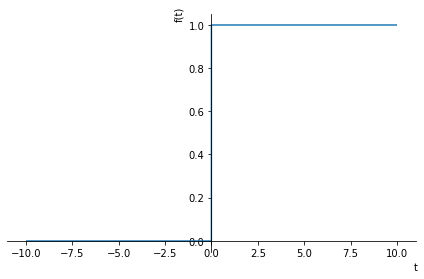

The Laplace transform of the signal is 


In [2]:
f = sym.Heaviside(t) # This is the unit step function in sympy

sym.plot(f)

F = sym.laplace_transform(f, t, s, noconds=True)

print("The Laplace transform of the signal is ", )

F

##Impulse function

Consider the impuse function $\delta(t)$ given as
$$
\delta(t)= \left\{ \begin{aligned} 0 & \quad \mbox{se}~t \neq 0 \\ \infty & \quad \mbox{se}~ t= 0  \end{aligned}\right., \quad  \mbox{such that} \quad \int_{-\infty}^{\infty} \delta(t)dt=1,  
$$

The Laplace transform can be computed via the integral

\begin{equation*}
F(s)=\int_{0}^{\infty}\delta(t)e^{-st}dt =e^{-s0}=1
\end{equation*}

In the computational solution we need to be careful to consider the inferior limit of the integral to be $0^-$. This is because the impulse function is defined as a function of its integral. 


In [3]:
delta = sym.DiracDelta(t) # This is the impulse function in SymPy

tau = sym.symbols('tau', real=True)

#The integral needs to start in 0

F = sym.limit( sym.integrate(delta,(t,tau,sym.oo)), tau, 0, dir='-')

print("The Laplace transform of the signal is F =",F )


The Laplace transform of the signal is F = 1


Time delay
$$
\mathcal{L}\left[ f(t-\tau) \right]= e^{-s\tau}\mathcal{L}\left[f(t)\right]
$$

Obtain the Laplace transform of the sinal $f(t)=3u(t-2)$. 

In [4]:
f = 3*sym.Heaviside(t-2) 

F = sym.laplace_transform(f, t, s, noconds=True)

print("The Laplace transform of the signal is ", )

F

The Laplace transform of the signal is 


Exponential scaling
$$
\mathcal{L}\left[ e^{at}f(t) \right]= F(s-a),\quad  \mbox{with}\quad F(s)=    \mathcal{L}\left[f(t) \right]
$$

Obtain the Laplace transform of the signal $f(t)e^{at}u(t)$

In [5]:
a = sym.symbols('a', real=True)

f = sym.exp(a*t)*sym.Heaviside(t) 

F = sym.laplace_transform(f, t, s, noconds=True)

print("The Laplace transform of the signal is ", )

F

The Laplace transform of the signal is 


Obtain the Laplace transform of the signal $f(t)=\cos(\omega t)u(t)$. 

Note that $f(t)$ can be written as

$$    
f(t)=\frac{e^{j\omega t}+e^{-j \omega t}}{2}u(t)
    =\frac{e^{j\omega t}}{2}u(t)+\frac{e^{-j\omega t}}{2}u(t)
$$

Applying the property

$$
\mathcal{L}\left[f(t) \right]=\frac{1}{2}\frac{1}{(s-j\omega)}+ \frac{1}{2}\frac{1}{(s+j\omega)} = \frac{s}{s^2+\omega^2} 
$$    

In [6]:
omega = sym.symbols('omega', real=True)

f = sym.cos(omega*t)*sym.Heaviside(t) 

F = sym.laplace_transform(f, t, s, noconds=True)

print("The Laplace transform of the signal is ", )

F

The Laplace transform of the signal is 


Multiplying by $t$
$$
    \mathcal{L}\left[ tf(t) \right]= -\frac{d}{ds}    \mathcal{L}\left[f(t) \right].
$$

Obtain the Laplace transform of the signal $f(t)=tu(t)$. 
    
$$
\mathcal{L}\left[ tu(t) \right]= -\frac{d}{ds}    \mathcal{L}\left[u(t) \right] =-\frac{d}{ds}\left(\frac{1}{s}\right) =\frac{1}{s^2}
$$

In [7]:
f = t*sym.Heaviside(t) 

F = sym.laplace_transform(f, t, s, noconds=True)

print("The Laplace transform of the signal is ", )

F

The Laplace transform of the signal is 


 By using the properties presented above, obtain the Laplace transform of the signal $g(t)=100te^{-t}\cos(2t)u(t)$.

Note that 
$$
\mathcal{L}\left[ 100te^{-t}\cos(2t)u(t) \right]= -100\frac{d}{ds}    \mathcal{L}\left[e^{-t}\cos(2t)u(t) \right],
$$
and
$$
\mathcal{L}\left[e^{-t}\cos(2t)u(t) \right]=F(s+1)~ \mbox{where} ~F(s)=    \mathcal{L}\left[cos(2t)u(t) \right] 
$$





*   Obtain $F(s)$
$$
F(s)=\frac{s}{s^2+2^2}
$$

*   Obtain $F(s+1)$
$$
F(s+1)=\frac{s+1}{(s+1)^2+2^2}
$$

*   In the final step Compute $G(s)=\displaystyle{-100\frac{d}{ds}F(s+1)}$.

$$
G(s)=-100\frac{d}{ds}\frac{s+1}{(s+1)^2+2^2}= -100\frac{1(s^2+2s+1+4)-(s+1)(2s+2)}{(s^2+2s+1+4)^2}
$$

$$
G(s)=-100\frac{-s^2-2s+3}{(s^2+2s+5)^2} =100\frac{(s+1)^2-4}{(s^2+2s+5)^2}
$$
    


The Laplace transform of the signal is 


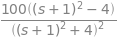

In [8]:
g = 100*t*sym.exp(-t)*sym.cos(2*t)*sym.Heaviside(t) 

G = sym.laplace_transform(g, t, s, noconds=True)

print("The Laplace transform of the signal is ", )

G